In [1]:
import numpy as np
import pandas as pd
import glob
import json
import os
import sys
import urllib.request
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver

# 시간계산을 위함
import datetime as dt
from dateutil.relativedelta import relativedelta
import pymysql

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
# machine learning

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier
import collections
from collections import Counter

from sklearn.model_selection import KFold
from joblib import dump, load

from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima_model import ARIMA

In [3]:
def selectDJ() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])

    # db 커넥션 연결
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

#     conn = pymysql.connect(host='localhost', port=3306,
#                            user='flo', passwd='flo', db='db', charset='utf8')

    try:
        with conn.cursor() as cursor:
            sql = 'SELECT dj_date, dj_close, dj_open, dj_high, dj_low, dj_volume FROM dowjones '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date.astype('datetime64[ns]')
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

In [4]:
def selectGold() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])
    # db 커넥션 연결
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

#     conn = pymysql.connect(host='localhost', port=3306,
#                            user='flo', passwd='flo', db='db', charset='utf8')

    try:
        with conn.cursor() as cursor:
            sql = 'SELECT gold_date, gold_close, gold_open, gold_high, gold_low, gold_volume '
            sql += 'FROM gold '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date.astype('datetime64[ns]')
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

In [5]:
def selectBitcoin() : 
    tmp_df = pd.DataFrame([])
    
    tmp_date = np.array([])
    tmp_close = np.array([])
    tmp_open = np.array([])
    tmp_high = np.array([])
    tmp_low = np.array([])
    tmp_volume = np.array([])
    # db 커넥션 연결
    conn = pymysql.connect(host='localhost', port=3306,
                           user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

#     conn = pymysql.connect(host='localhost', port=3306,
#                            user='flo', passwd='flo', db='db', charset='utf8')

    try:
        with conn.cursor() as cursor:
            sql = 'SELECT bit_date, bit_close, bit_open, bit_high, bit_low, bit_volume '
            sql += 'FROM bitcoin '

            cursor.execute(sql)
            conn.commit()

            rows = cursor.fetchall()
            
            for i in range(len(rows)) :
                tmp_date = np.append(tmp_date, rows[i][0])
                tmp_close = np.append(tmp_close, rows[i][1])
                tmp_open = np.append(tmp_open, rows[i][2])
                tmp_high = np.append(tmp_high, rows[i][3])
                tmp_low = np.append(tmp_low, rows[i][4])
                tmp_volume = np.append(tmp_volume, rows[i][5])
                
    finally:
        conn.close()
    
    tmp_df['date'] = tmp_date.astype('datetime64[ns]')
    tmp_df['close'] = tmp_close
    tmp_df['open'] = tmp_open
    tmp_df['high'] = tmp_high
    tmp_df['low'] = tmp_low
    tmp_df['volume'] = tmp_volume
    
    tmp_df = tmp_df.set_index('date')
    
    return(tmp_df)

In [6]:
dowjones_DF = selectDJ()
gold_DF = selectGold()
bitcoin_DF = selectBitcoin()

dowjones_subDF = dowjones_DF.loc[:,['close','open']]
gold_subDF = gold_DF.loc[:,['close','open']]
bitcoin_subDF = bitcoin_DF.loc[:,['close','open']]

dowjones_subDF = dowjones_subDF.add_prefix('dj_')
gold_subDF = gold_subDF.add_prefix('gol_')
bitcoin_subDF = bitcoin_subDF.add_prefix('bit_')

result_sub = pd.concat([bitcoin_subDF, gold_subDF, dowjones_subDF], axis = 1, sort=False)

# na 값에 대해서 padding 처리한 과정 : 값이 없으면 전날 데이터 기준으로 들어간다

beforeDate = result_sub.index[0]

for date in result_sub.index :
    for cols in result_sub.columns :
        if pd.isnull(result_sub.at[date,cols]) == True :
            result_sub.at[date,cols] = result_sub.at[beforeDate,cols]
    beforeDate = date


# db 커넥션 연결
conn = pymysql.connect(host='localhost', port=3306,
                       user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

# conn = pymysql.connect(host='localhost', port=3306,
#                        user='flo', passwd='flo', db='db', charset='utf8')

try:
    with conn.cursor() as cursor:
        sql = 'SELECT IFNULL(MAX(cl_date),"2013-01-01") FROM al_close '
        
        cursor.execute(sql)
        
        rows = cursor.fetchone()
        lastDate = rows[0]
        
        # db에 기록된 가장 최근값과 오늘의 날짜 반납( 이 기준으로 db에서 가져옴)
        
        recentlyDate = pd.to_datetime(lastDate).date()
        recentlyDate += dt.timedelta(days=1) # 하루 추가하기(다음날로 확인하는 거)
        today = dt.datetime.now().date()
        
        result_sub_update = result_sub.loc[recentlyDate:,:]
        
        if recentlyDate < today :
            for date in result_sub_update.index :

                sql = 'INSERT INTO al_close(cl_date, cl_bitcoin, cl_gold, cl_dowjones) '
                sql += 'VALUES(%s,%s,%s,%s) '

                cursor.execute(sql,(date.date(),float(result_sub_update.at[date,'bit_close']),float(result_sub_update.at[date,'gol_close']),float(result_sub_update.at[date,'dj_close'])) )


        conn.commit()

finally:
    conn.close()

In [7]:
# 평균선 feature 만들기
def mkFeat(df,typeName) :
    df[typeName+'_MA_5'] = df[typeName+'_close'].rolling(window=5).mean()
    df[typeName+'_MA_60'] = df[typeName+'_close'].rolling(window=60).mean()


# 차이 만들기
def mkDif(df, typeName) :
    df[typeName+'_dif'] = df[typeName+'_MA_5'] - df[typeName+'_MA_60']
    df[typeName+'_dif_before_1d'] = df[typeName+'_dif'].shift(1)
    
# target 만들기

def mkTarget(df, typeName) :
    tmp_change = np.array([])
    
    df[typeName+'_close_after_1d'] = df[typeName+'_close'].shift(-1)
    df.at[df.index[-1], typeName+'_close_after_1d'] = 0
    for date in df.index :
        tmp_change = np.append(tmp_change, (lambda x : 1 if x>0 else (-1 if x<0 else 0))(df.at[date,typeName+'_close_after_1d']-df.at[date,typeName+'_close']))
    
    df[typeName+'_change'] = tmp_change.astype('int64')
    df.at[df.index[-1],typeName+'_change'] = None

In [8]:
# 새로 컨트롤할 데이터 출력
upData = result_sub.loc[:,['bit_close','gol_close','dj_close']]

# 실제 연산하는 자리
dataList = ['bit','gol','dj']

for cols in dataList :
    mkFeat(upData,cols)
    mkDif(upData,cols)
    mkTarget(upData,cols)


# 컬럼 순서 엉킨거 조정 및 필요없는거 제거
upData = upData[['bit_close','bit_MA_5','bit_MA_60','bit_dif','bit_dif_before_1d',
                 'gol_close','gol_MA_5','gol_MA_60','gol_dif','gol_dif_before_1d',
                 'dj_close','dj_MA_5','dj_MA_60','dj_dif','dj_dif_before_1d',
                 'bit_change','gol_change','dj_change'
                ]]

In [104]:
check = upData['bit_close'].shift(-1)
check

date
2013-01-02      13.40
2013-01-03      13.50
2013-01-04      13.44
2013-01-05      13.45
2013-01-06      13.59
               ...   
2020-01-26    8912.00
2020-01-27    9393.70
2020-01-28    9304.20
2020-01-29    9322.50
2020-01-30        NaN
Name: bit_close, Length: 2578, dtype: float64

In [10]:
upData

,bit_close,bit_MA_5,bit_MA_60,bit_dif,bit_dif_before_1d,gol_close,gol_MA_5,gol_MA_60,gol_dif,gol_dif_before_1d,dj_close,dj_MA_5,dj_MA_60,dj_dif,dj_dif_before_1d,bit_change,gol_change,dj_change
date,,,,,,,,,,,,,,,,,,
2013-01-02,13.28,NaN,NaN,NaN,NaN,1687.90,NaN,NaN,NaN,NaN,13412.55,NaN,NaN,NaN,NaN,1.0,-1.0,-1.0
2013-01-03,13.40,NaN,NaN,NaN,NaN,1673.70,NaN,NaN,NaN,NaN,13391.36,NaN,NaN,NaN,NaN,1.0,-1.0,1.0
2013-01-04,13.50,NaN,NaN,NaN,NaN,1648.10,NaN,NaN,NaN,NaN,13435.21,NaN,NaN,NaN,NaN,-1.0,0.0,0.0
2013-01-05,13.44,NaN,NaN,NaN,NaN,1648.10,NaN,NaN,NaN,NaN,13435.21,NaN,NaN,NaN,NaN,1.0,0.0,0.0
2013-01-06,13.45,13.414,NaN,NaN,NaN,1648.10,1661.18,NaN,NaN,NaN,13435.21,13421.908,NaN,NaN,NaN,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,9327.60,9356.240,7942.515167,1413.724833,1440.504833,1593.55,1585.83,1530.786667,55.043333,53.514167,28398.39,28402.292,28612.731333,-210.439333,-130.967333,-1.0,-1.0,1.0
2020-02-04,9197.40,9331.220,7969.333500,1361.886500,1413.724833,1557.85,1582.21,1532.332500,49.877500,55.043333,28808.64,28392.288,28625.957667,-233.669667,-210.439333,1.0,1.0,1.0
2020-02-05,9209.20,9299.580,7997.100167,1302.479833,1361.886500,1558.35,1577.30,1533.886667,43.413333,49.877500,29290.85,28600.164,28647.220833,-47.056833,-233.669667,1.0,1.0,1.0


In [17]:
# makedData 쪽 db 연결 및 데이터 채우기
# 빈데이터에는 빈값을 넣기 위해서 각각의 자리에 라인 if/else 함수로 넣었음

# db 커넥션 연결
conn = pymysql.connect(host='localhost', port=3306,
                       user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

# conn = pymysql.connect(host='localhost', port=3306,
#                        user='flo', passwd='flo', db='db', charset='utf8')

try:
    with conn.cursor() as cursor:
        sql = 'SELECT IFNULL(MAX(md_date),"2013-01-01") FROM makedData '
        
        cursor.execute(sql)
        
        rows = cursor.fetchone()
        lastDate = rows[0]
        
        # db에 기록된 가장 최근값과 오늘의 날짜 반납( 이 기준으로 db에서 가져옴)
        
        recentlyDate = pd.to_datetime(lastDate).date()
        recentlyDate += dt.timedelta(days=1) # 하루 추가하기(다음날로 확인하는 거)
        today = dt.datetime.now().date()
        
        
        if recentlyDate < today :
            for date in upData.loc[recentlyDate:,:].index :

                sql = 'INSERT INTO makedData(md_date, md_bit_close, md_bit_ma5, md_bit_ma60, md_bit_dif, md_bit_dif_b1, '
                sql += 'md_gol_close, md_gol_ma5, md_gol_ma60, md_gol_dif, md_gol_dif_b1, '
                sql += 'md_dj_close, md_dj_ma5, md_dj_ma60, md_dj_dif, md_dj_dif_b1, '
                sql += 'md_bit_change, md_gol_change, md_dj_change) '
                sql += 'VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s) '

                cursor.execute(sql,(date.date(),float(upData.at[date,'bit_close']),float(upData.at[date,'bit_MA_5']) if pd.notnull(upData.at[date,'bit_MA_5']) else None, float(upData.at[date,'bit_MA_60']) if pd.notnull(upData.at[date,'bit_MA_60']) else None, float(upData.at[date,'bit_dif']) if pd.notnull(upData.at[date,'bit_dif']) else None,float(upData.at[date,'bit_dif_before_1d']) if pd.notnull(upData.at[date,'bit_dif_before_1d']) else None,
                                   float(upData.at[date,'gol_close']),float(upData.at[date,'gol_MA_5']) if pd.notnull(upData.at[date,'gol_MA_5']) else None,float(upData.at[date,'gol_MA_60']) if pd.notnull(upData.at[date,'gol_MA_60']) else None,float(upData.at[date,'gol_dif']) if pd.notnull(upData.at[date,'gol_dif']) else None,float(upData.at[date,'gol_dif_before_1d']) if pd.notnull(upData.at[date,'gol_dif_before_1d']) else None,
                                   float(upData.at[date,'dj_close']),float(upData.at[date,'dj_MA_5']) if pd.notnull(upData.at[date,'dj_MA_5']) else None ,float(upData.at[date,'dj_MA_60']) if pd.notnull(upData.at[date,'dj_MA_60']) else None,float(upData.at[date,'dj_dif']) if pd.notnull(upData.at[date,'dj_dif']) else None ,float(upData.at[date,'dj_dif_before_1d']) if pd.notnull(upData.at[date,'dj_dif_before_1d']) else None,
                                   int(upData.at[date,'bit_change']) if pd.notnull(upData.at[date,'bit_change']) else None,int(upData.at[date,'gol_change']) if pd.notnull(upData.at[date,'gol_change']) else None,int(upData.at[date,'dj_change']) if pd.notnull(upData.at[date,'dj_change']) else None ) )


        conn.commit()

finally:
    conn.close()

In [18]:
recentlyDate, today

(datetime.date(2020, 2, 8), datetime.date(2020, 2, 7))

In [14]:
upData.loc[recentlyDate:,:].index

DatetimeIndex(['2020-02-06', '2020-02-07'], dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
# arima predict custom function

In [9]:
def arima_predict(df, typeData) :
    
    if typeData == 'gol' :
        orders =(0,2,1)
    else :
        orders = (1,2,2)
        
    predictDay = 1
    
    beforeYear= dt.datetime.now().date().replace(year=dt.datetime.now().year-3)
    testDate = dt.datetime.now().date().replace(day=dt.datetime.now().day)
    
    featureTrain = result_sub.loc[beforeYear:testDate,typeData+'_close']
    featureTest = result_sub.loc[testDate:,typeData+'_close']
    
    arima_model = ARIMA(featureTrain, order=orders)
    arima_fit = arima_model.fit(trend='nc', full_output=True, disp=1)
    
    arima_predict = arima_fit.forecast(steps=predictDay)
#     featureTest
    
    return (arima_predict[0],featureTest)

In [10]:
dataList = ['bit','gol','dj']

for cols in dataList :
    vars()[cols+'_pred'], vars()[cols+'_test'] = arima_predict(upData,cols)

C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base

In [11]:
for cols in dataList :
    print(vars()[cols+'_pred'],vars()[cols+'_test'])

[9229.64622161] Series([], Name: bit_close, dtype: float64)
[1558.59420264] Series([], Name: gol_close, dtype: float64)
[28838.14967678] Series([], Name: dj_close, dtype: float64)


In [ ]:
# 예측 값 비교

In [19]:
# splitXY
def splitXY(df, dataType) :
    temp_x = df.loc[:,[dataType+'_close', dataType+'_MA_5',dataType+'_MA_60', dataType+'_dif',dataType+'_dif_before_1d']]
    temp_y = df.loc[:,dataType+'_change']
    return(temp_x, temp_y)

In [36]:
dataList = ['bit','gol','dj']

for cols in dataList :
    vars()[cols+'_x'], vars()[cols+'_y'] = splitXY(upData, cols)

In [37]:
# classification 확인하기 위해 validation

for cols in dataList :
    vars()[cols+'_x_train'] = vars()[cols+'_x'].iloc[:-1,:]
    vars()[cols+'_y_train'] = vars()[cols+'_y'].iloc[:-1]
    
    vars()[cols+'_x_test'] = vars()[cols+'_x'].iloc[-1,:]
    vars()[cols+'_y_test'] = vars()[cols+'_y'].iloc[-1]


In [ ]:
# classifier
# knn, svm, rfc, xgb, lgb 의 예측값을 확인해서 ensemble 처리

# svm은 ㅈㄴ 느려서 안됨

In [20]:
# get knn_best
def getKnc(x_train,y_train,x_test,kfold) :
    x_test_trans = pd.DataFrame(x_test)
    
    knc = KNeighborsClassifier(n_jobs = -1)
    
    parameters = {
        'n_neighbors':np.arange(1,11,2),
        'weights':['uniform','distance']
    }
    n_iter_search=10
    knc_rgs = RandomizedSearchCV(knc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    knc_rgs.fit(x_train, y_train)
    
    # Random Grid Search 기준으로 Grid Search의 파라미터 값 처리
    rgs_best_nei = knc_rgs.best_params_.get('n_neighbors')
    rgs_best_weights = knc_rgs.best_params_.get('weights')
    
    grid_params = {
        'n_neighbors':np.arange(rgs_best_nei-2 if rgs_best_nei>2 else 1, rgs_best_nei+4,2),
        'weights':rgs_best_weights
    }
    
    n_iter_search=10
    knc_gs = GridSearchCV(knc, param_grid=parameters, cv=kfold,scoring='accuracy',verbose=1, n_jobs=-1)

    knc_gs.fit(x_train, y_train)
    knc_best = knc_gs.best_estimator_
    prediction = knc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],knc_best)

In [23]:
# Random GridSearch만 적용함..사유는 너무나 느려서, 2중으로 적용해서 결과를 도출해냄
# Random Grid Search 도 2번돌리면 뻣는데 뭐지 ?
def getSvm(x_train,y_train,x_test,kfold) :
    x_test_trans = pd.DataFrame(x_test)
    
    svc = SVC(max_iter=100000)
    
    parameters = {
        'C':np.arange(1,5,0.5),   # np.arange(1,5),
        'kernel':['rbf','poly'],
        'degree':np.arange(2,5),
        'gamma': [0.01,0.1,1,10]
    }
    n_iter_search=10
    svc_rgs = RandomizedSearchCV(svc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    svc_rgs.fit(x_train, y_train)
    
    svc_best = svc_rgs.best_estimator_
    prediction = svc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],svc_best)

In [22]:
# Random GridSearch만 적용함..사유는 너무나 느려서, 2중으로 적용해서 결과를 도출해냄
# Random Grid Search 도 2번돌리면 뻣는데 뭐지 ?
def getSvm_oldRgs2(x_train,y_train,x_test) :
    x_test_trans = pd.DataFrame(x_test)
    
    svc = SVC()
    
    parameters = {
        'C':np.arange(1,10),
        'kernel':['rbf','poly','linear'],
        'degree':np.arange(2,5),
        'gamma': [0.01,0.1,1,10]
    }
    n_iter_search=10
    svc_rgs = RandomizedSearchCV(svc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    svc_rgs.fit(x_train, y_train)
    
    # Random Grid Search 기준으로 Grid Search의 파라미터 값 처리
    svc_c = svc_rgs.best_params_.get('C')
    svc_k = svc_rgs.best_params_.get('kernel')
    svc_d = svc_rgs.best_params_.get('degree')
    svc_g = svc_rgs.best_params_.get('gamma')
    
    parameters = {
        'C':np.arange(svc_c-1 if svc_c > 1 else 1,svc_c+2),
        'kernel':svc_k,
        'degree':np.arange(svc_d-1 if svc_d > 1 else 1,svc_d+2),
        'gamma': np.arange(svc_g/2,svc*3/2,svc_g/10)
    }
    
#     svc_rgs_tune = GridSearchCV(svc, param_grid=parameters, cv=7,scoring='accuracy', n_jobs=-1)
    svc_rgs_tune = RandomizedSearchCV(svc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    svc_rgs_tune.fit(x_train, y_train)

    svc_rgs_tune.fit(x_train, y_train)
    svc_best = svc_rgs_tune.best_estimator_
    prediction = svc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],svc_best)

In [24]:
def getRfc(x_train,y_train,x_test,kfold) :
    x_test_trans = pd.DataFrame(x_test)
    
    rfc = RandomForestClassifier(n_jobs=-1)
    
    parameters = {
        'n_estimators':np.arange(50,1000,50),
        'max_features':np.arange(1,6),
        'min_samples_split':np.arange(2,5),
        'max_depth':np.arange(2,15)
    }
    n_iter_search=10
    rfc_rgs = RandomizedSearchCV(rfc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    rfc_rgs.fit(x_train, y_train)
    
    # Random Grid Search 기준으로 Grid Search의 파라미터 값 처리
    rs_ne = rfc_rgs.best_params_.get('n_estimators')
    rs_mf = rfc_rgs.best_params_.get('max_features')
    rs_de = rfc_rgs.best_params_.get('max_depth')
    rs_sp = rfc_rgs.best_params_.get('min_samples_split')


    parameters = {
        'n_estimators':np.arange(rs_ne-1,rs_ne+1),
        'max_features':np.arange(rs_mf-1 if rs_mf > 1 else 1,rs_mf+2 if rs_mf < x_train.shape[1] else x_train.shape[1]),
        'min_samples_split':np.arange(rs_sp-1 if rs_sp > 2 else 2,rs_sp+2),
        'max_depth':np.arange(rs_de-2 if rs_de > 2 else 1,rs_de+3)
    }

    
    rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv=kfold,scoring='accuracy', verbose=1, n_jobs=-1)

    rfc_gs.fit(x_train, y_train)
    rfc_best = rfc_gs.best_estimator_
    prediction = rfc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],rfc_best)

In [25]:
def getXgbc(x_train,y_train,x_test,kfold) :
    x_test_trans = pd.DataFrame(x_test)
    
    xgbc = XGBClassifier(verbosity=1, n_jobs=-1)
    
    parameters = {
        'n_estimators':np.arange(50,1000,50),
        'learning_rate':np.arange(0.3,0.01,-0.05),
        'max_depth':np.arange(2,10)
    }
    n_iter_search=10
    xgbc_rgs = RandomizedSearchCV(xgbc, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    xgbc_rgs.fit(x_train, y_train)
    
    # Random Grid Search 기준으로 Grid Search의 파라미터 값 처리
    xg_ne = xgbc_rgs.best_params_.get('n_estimators')
    xg_lr = xgbc_rgs.best_params_.get('learning_rate')
    xg_md = xgbc_rgs.best_params_.get('max_depth')


    parameters = {
        'n_estimators':np.arange(xg_ne-1,xg_ne+1),
        'learning_rate':np.arange(xg_lr+0.04,xg_lr-0.05 if xg_lr > 0.05 else 0.01, -0.02),
        'max_depth':np.arange(xg_md-2 if xg_md > 4 else 2, xg_md+2)
    }

    
    xgbc_gs = GridSearchCV(xgbc, param_grid=parameters, cv=kfold,scoring='accuracy',verbose=1, n_jobs=-1)

    xgbc_gs.fit(x_train, y_train)
    xgbc_best = xgbc_gs.best_estimator_
    prediction = xgbc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],xgbc_best)

In [26]:
def getLgbc(x_train,y_train,x_test,kfold) :
    x_test_trans = pd.DataFrame(x_test)
    
    LGB = LGBMClassifier(verbose=1, n_jobs=-1)
    
    parameters = {
        'n_estimators':np.arange(50,1000,50),
        'learning_rate':np.arange(0.3,0.01,-0.05),
        'max_depth':np.arange(2,20,2)
    }
    n_iter_search=10
    lgbc_rgs = RandomizedSearchCV(LGB, param_distributions=parameters, cv=kfold,
                                scoring='accuracy', n_jobs=-1,
                                verbose=1,random_state=1234,
                                n_iter=n_iter_search)
    lgbc_rgs.fit(x_train, y_train)
    
    # Random Grid Search 기준으로 Grid Search의 파라미터 값 처리
    lg_ne = lgbc_rgs.best_params_.get('n_estimators')
    lg_lr = lgbc_rgs.best_params_.get('learning_rate')
    lg_md = lgbc_rgs.best_params_.get('max_depth')


    parameters = {
        'n_estimators':np.arange(lg_ne-1,lg_ne+1),
        'learning_rate':np.arange(lg_lr+0.04,lg_lr-0.05 if lg_lr > 0.05 else 0.01, -0.02),
        'max_depth':np.arange(lg_md-2 if lg_md > 4 else 2, lg_md+2)
    }

    
    lgbc_gs = GridSearchCV(LGB, param_grid=parameters, cv=kfold,scoring='accuracy',verbose=1, n_jobs=-1)

    lgbc_gs.fit(x_train, y_train)
    lgbc_best = lgbc_gs.best_estimator_
    prediction = lgbc_best.predict(x_test_trans.T)
    
    # 반환 : 예측값, 배스트 모델값
    return (prediction[0],lgbc_best)

In [27]:
def ensembleVC(knc,svc,rfc,xgbc,lgbc,x_train,y_train,x_test) :
    x_test_trans = pd.DataFrame(x_test)
    
    evc = VotingClassifier(estimators= [('knc',knc),('svc',svc),('rfc',rfc),('xgb',xgbc), ('lgbc',lgbc)],
                       voting='hard')
    evc.fit(x_train,y_train)
    evc_pred = evc.predict(x_test_trans.T)
    
    return(evc_pred[0], evc)

In [28]:
def getArima(df, dataType) :
    
    if dataType == 'gol' :
        orders =(0,2,1)
    else :
        orders = (1,2,2)
        
    
    X_train = df.loc[:,dataType+'_close']
    
    arima_model = ARIMA(X_train, order=orders)
    arima_fit = arima_model.fit(trend='nc', full_output=True, disp=1)
    
    arima_predict = arima_fit.forecast(steps=1)
    
    return (arima_predict[0])

In [29]:
# splitXY
def splitXY(df, dataType) :
    temp_x = df.loc[:,[dataType+'_close', dataType+'_MA_5',dataType+'_MA_60', dataType+'_dif',dataType+'_dif_before_1d']]
    temp_y = df.loc[:,dataType+'_change']
    return(temp_x, temp_y)


In [30]:
# 전체 모듈합산 함수 - 자동화를 위해
def predict(df,dataType,dateNum) :
    # 나중에 날짜 받는걸 만들어야할듯
    
    # feature, target 분할
    tmp_x, tmp_y = splitXY(df, dataType)
    
    # train, test 분할
    tmp_x_train = tmp_x.iloc[:-1,:]
    tmp_y_train = tmp_y.iloc[:-1]
    tmp_x_test = tmp_x.iloc[-1,:]
    #tmp_y_test = tmp_y.iloc[-1]
    
    # 나중에 데이터 획득 시점을 변경하기 위한 알고리즘
    dateList = [upData.index[-1].date() - relativedelta(months=3),
                upData.index[-1].date() - relativedelta(years=1),
                upData.index[-1].date() - relativedelta(years=2),
                upData.index[-1].date() - relativedelta(years=3),
                upData.index[-1].date() - relativedelta(years=5)]
    
    # 같은 데이터를 하기위해 kfold 조정
    kfold = KFold(n_splits=7, random_state=0,shuffle = True)
    
    # 분할 된 데이터로 각 모듈 작업
    pred_knc, knc_best = getKnc(tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],tmp_x_test,kfold)
    pred_svc, svc_best = getSvm(tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],tmp_x_test,kfold)
    pred_rfc, rfc_best = getRfc(tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],tmp_x_test,kfold)
    pred_xgbc, xgbc_best = getXgbc(tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],tmp_x_test,kfold)
    pred_lgbc, lgbc_best = getLgbc(tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],tmp_x_test,kfold)
    
    # 5가지의 모듈 값을 기준으로 ensemble voting 실시
    pred_vote, vote_best = ensembleVC(knc_best,svc_best,rfc_best,xgbc_best,lgbc_best,
                                      tmp_x_train.loc[dateList[dateNum]:,:], tmp_y_train.loc[dateList[dateNum]:],
                                      tmp_x_test)
    
    # arima_predict 값
    pred_arima = getArima(tmp_x_train.loc[dateList[dateNum]:,:], dataType)
    
    return(pred_vote, pred_knc, pred_svc, pred_rfc, pred_xgbc, pred_lgbc, pred_arima)


In [25]:
# 값 전달을 못해서 임시 폐기

def predict_all(df,dateNum) :
    dataList = ['bit','gol','dj']
    # 각 dataFrame 선언
    for d in dataList :
        vars()[d+'_pred'] = pd.DataFrame([])
    
    # 각 data에 대해서 데이터 연산 구하기
    for d in dataList :
        tmp_vote, tmp_knc,tmp_svc,tmp_rfc, tmp_xgbc,tmp_lgbc,tmp_arima = predict(df,d,dateNum)
        vars()[d+'_pred'] = vars()[d+'_pred'].append({'vote':tmp_vote,'knc':tmp_knc,'svc':tmp_svc,'rfc':tmp_rfc,'xgbc':tmp_xgbc,'lgbc':tmp_lgbc,'arima':tmp_arima[0] },ignore_index=True)
    
    return (bit_pred, gol_pred, dj_pred)

In [31]:
dataList = ['bit','gol','dj']
# 각 dataFrame 선언
for d in dataList :
    vars()[d+'_pred'] = pd.DataFrame([])

# 각 data에 대해서 데이터 연산 구하기
for d in dataList :
    tmp_vote, tmp_knc,tmp_svc,tmp_rfc, tmp_xgbc,tmp_lgbc,tmp_arima = predict(upData,d,0)
    vars()[d+'_pred'] = vars()[d+'_pred'].append({'vote':tmp_vote,'knc':tmp_knc,'svc':tmp_svc,'rfc':tmp_rfc,'xgbc':tmp_xgbc,'lgbc':tmp_lgbc,'arima':tmp_arima[0] },ignore_index=True)

bit_pred, gol_pred, dj_pred

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.1s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.1s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 90 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.1min finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    6.4s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   37.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.4s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
[Parallel(n_jobs=-1)]: 

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   23.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   19.2s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  1.8min finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.9s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.9s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   24.2s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   18.4s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  1.8min finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.0s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\dev\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


(         arima  knc  lgbc  rfc  svc  vote  xgbc
 0  9736.404098  1.0  -1.0  1.0 -1.0   1.0   1.0,
          arima  knc  lgbc  rfc  svc  vote  xgbc
 0  1570.372659  1.0   1.0  1.0  1.0   1.0   1.0,
           arima  knc  lgbc  rfc  svc  vote  xgbc
 0  29423.659318  0.0   1.0  0.0  1.0   0.0   0.0)

In [32]:
# 예측값 DB에 데이터 채우기

# db 커넥션 연결
conn = pymysql.connect(host='localhost', port=3306,
                       user='acorn12', passwd='acorn12', db='acorn', charset='utf8')

# conn = pymysql.connect(host='localhost', port=3306,
#                        user='flo', passwd='flo', db='db', charset='utf8')

try:
    with conn.cursor() as cursor:
        sql = 'SELECT IFNULL(MAX(pc_date),"2013-01-01") FROM pred_clf '
        
        cursor.execute(sql)
        
        rows = cursor.fetchone()
        lastDate = rows[0]
        
        # db에 기록된 가장 최근값과 오늘의 날짜 반납( 이 기준으로 db에서 가져옴)
        
        recentlyDate = pd.to_datetime(lastDate).date()
        recentlyDate += dt.timedelta(days=1) # 하루 추가하기(다음날로 확인하는 거)
        
        if recentlyDate < upData.index[-1] :
            sql = 'INSERT INTO pred_clf(pc_date, pc_bit_arima, pc_gol_arima, pc_dj_arima, '
            sql += 'pc_bit_vote, pc_bit_knc, pc_bit_svc, pc_bit_rfc, pc_bit_xgbc, pc_bit_lgbc, '
            sql += 'pc_gol_vote, pc_gol_knc, pc_gol_svc, pc_gol_rfc, pc_gol_xgbc, pc_gol_lgbc, '
            sql += 'pc_dj_vote, pc_dj_knc, pc_dj_svc, pc_dj_rfc, pc_dj_xgbc, pc_dj_lgbc) '
            sql += 'VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s) '

            cursor.execute(sql,(upData.index[-1].date(), float(bit_pred['arima']), float(gol_pred['arima']), float(dj_pred['arima']),
                               int(bit_pred['vote']), int(bit_pred['knc']), int(bit_pred['svc']), int(bit_pred['rfc']), int(bit_pred['xgbc']), int(bit_pred['lgbc']),
                               int(gol_pred['vote']), int(gol_pred['knc']), int(gol_pred['svc']), int(gol_pred['rfc']), int(gol_pred['xgbc']), int(gol_pred['lgbc']),
                               int(dj_pred['vote']), int(dj_pred['knc']), int(dj_pred['svc']), int(dj_pred['rfc']), int(dj_pred['xgbc']), int(dj_pred['lgbc']) ) )


        conn.commit()

finally:
    conn.close()

In [44]:
# img 처리
dateList = [upData.index[-1].date() - relativedelta(months=3),
            upData.index[-1].date() - relativedelta(years=1),
            upData.index[-1].date() - relativedelta(years=2),
            upData.index[-1].date() - relativedelta(years=3),
            None]


upData_corr = upData.loc[dateList[1] :,['bit_close','bit_MA_5','bit_MA_60','gol_close','gol_MA_5','gol_MA_60','dj_close','dj_MA_5','dj_MA_60']].corr()
upData_corr

,bit_close,bit_MA_5,bit_MA_60,gol_close,gol_MA_5,gol_MA_60,dj_close,dj_MA_5,dj_MA_60
bit_close,1.000000,0.989573,0.862730,0.603883,0.592883,0.408537,0.278327,0.285792,0.467579
bit_MA_5,0.989573,1.000000,0.884243,0.618388,0.609936,0.429744,0.285171,0.290233,0.469295
bit_MA_60,0.862730,0.884243,1.000000,0.796533,0.794266,0.705950,0.369437,0.376315,0.531251
gol_close,0.603883,0.618388,0.796533,1.000000,0.994816,0.913523,0.684077,0.690377,0.756775
gol_MA_5,0.592883,0.609936,0.794266,0.994816,1.000000,0.925370,0.692174,0.693816,0.754465
gol_MA_60,0.408537,0.429744,0.705950,0.913523,0.925370,1.000000,0.703296,0.708600,0.750124
dj_close,0.278327,0.285171,0.369437,0.684077,0.692174,0.703296,1.000000,0.986457,0.847587
dj_MA_5,0.285792,0.290233,0.376315,0.690377,0.693816,0.708600,0.986457,1.000000,0.862562
dj_MA_60,0.467579,0.469295,0.531251,0.756775,0.754465,0.750124,0.847587,0.862562,1.000000


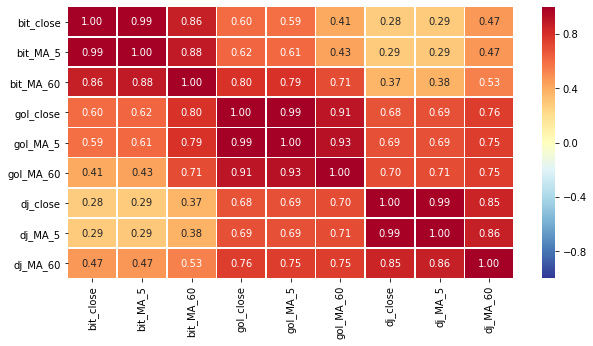

In [55]:
# 값이 다르니까 scaler를 적용해서 재 확인

# standard scaler
scaler = StandardScaler()
scaler.fit(upData_corr)
corr_scaled = scaler.transform = (upData_corr)

plt.figure(figsize = (10,5))
hm = sns.heatmap(data=corr_scaled, annot=True, fmt = '.2f', linewidths = .5,
            cmap='RdYlBu_r', vmin = -1, vmax = 1)
# 위 아래 0.5씩 더 줘서 꼬이는게 없어지게 하는 경우
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)

outImgPath = '../../workspace/.metadata/.plugins/org.eclipse.wst.server.core/tmp0/wtpwebapps/CorrelationAnalysis/info/img/corr_scale.jpg'
plt.savefig(outImgPath)

<Figure size 432x288 with 0 Axes>

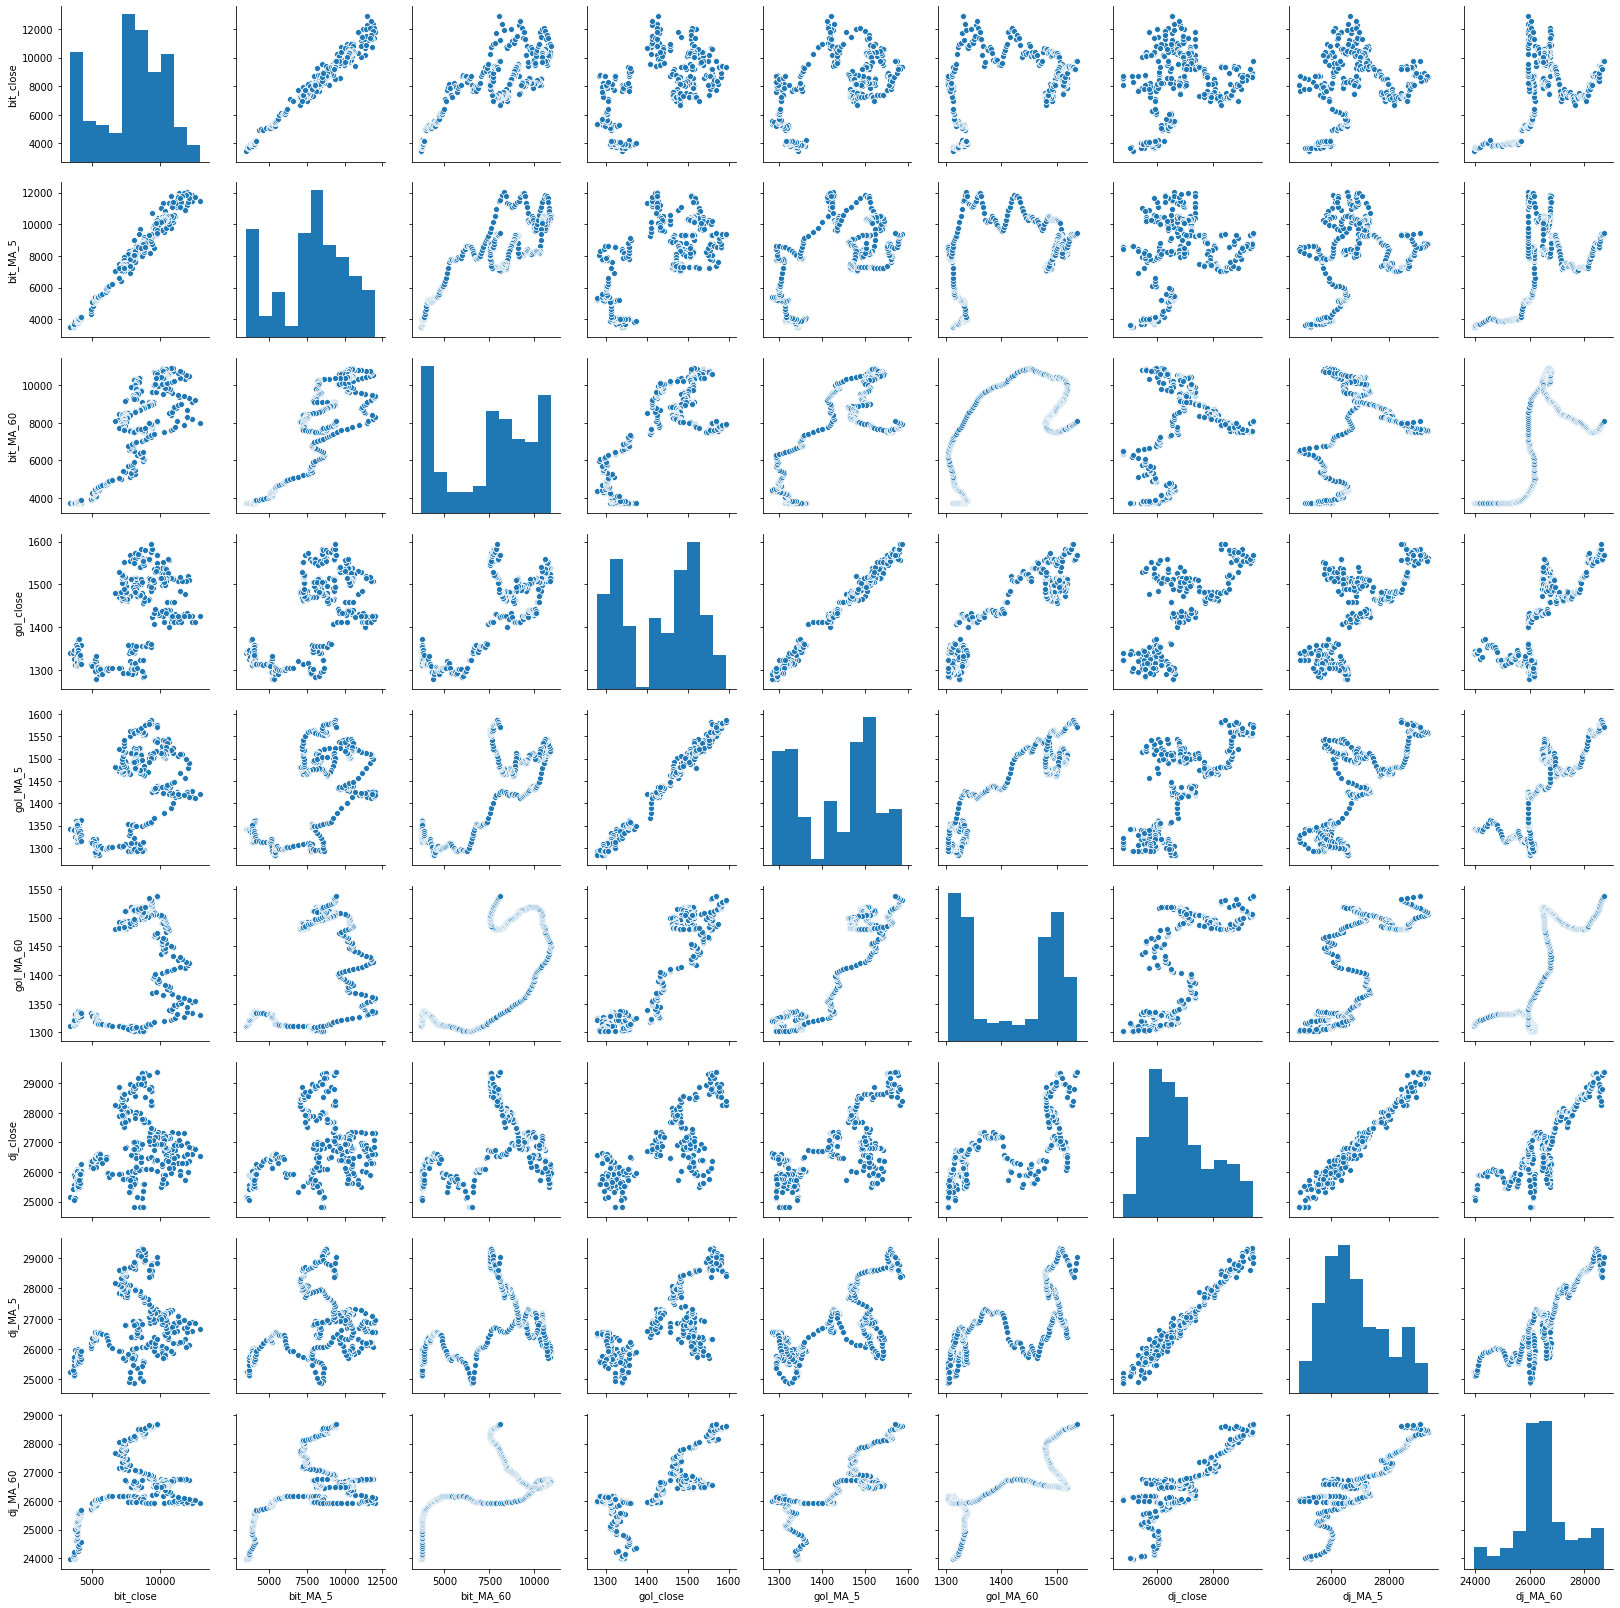

In [59]:
upData_new = upData.loc[dateList[1] :,['bit_close','bit_MA_5','bit_MA_60','gol_close','gol_MA_5','gol_MA_60','dj_close','dj_MA_5','dj_MA_60']]

plt.figure()
sns.pairplot(upData_new)

outImgPath = '../../workspace/.metadata/.plugins/org.eclipse.wst.server.core/tmp0/wtpwebapps/CorrelationAnalysis/info/img/corr_pair.jpg'
plt.savefig(outImgPath)